In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import wave
import os.path as os
from scipy.fftpack import fft, ifft
from scipy.signal import filtfilt, butter

El registro tiene 1  canal/canales
La frecuencia de muestreo es de 44100 Hz.


Text(0, 0.5, 'Voltaje [microV]')

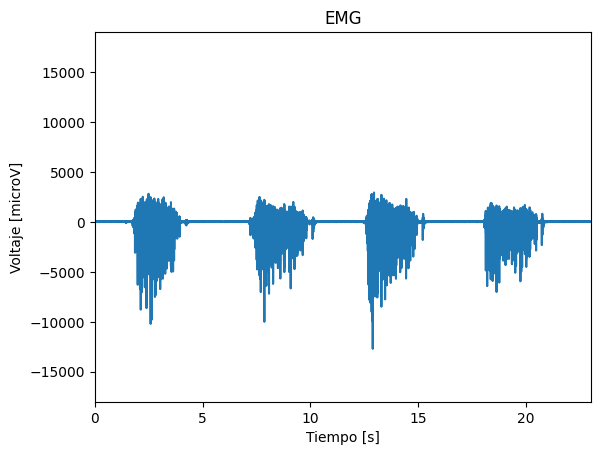

In [2]:
#Código tomado de https://github.com/emckiernan/electrophys/blob/master/EMG/EMGbasics/code/EMGanalysis.ipynb
# open .wav file by specifying the path and filename
record = wave.open('/Users/yann/Documents/Datos/EMG/S10_EMG_calf_intermittent.wav', 'r')
# extract number of channels, sample rate, data
numChannels = record.getnchannels() # number of channels
N = record.getnframes() # humber of frames
sampleRate = record.getframerate() # sampling rate
dstr = record.readframes(N * numChannels)
waveData = np.frombuffer(dstr, np.int16) 
# get the time window
timeEMG=np.linspace(0, len(waveData)/sampleRate, num=len(waveData))
# calculate frequency
freq = 1/np.mean(np.diff(timeEMG))
print('El registro tiene %d  canal/canales' % (numChannels))
print('La frecuencia de muestreo es de %d Hz.' % (sampleRate))
t0=0 #tiempo de inicio
tf=23#tiempo final
t_0=t0*sampleRate
t_f=tf*sampleRate
plt.plot(timeEMG[t_0:t_f],waveData[t_0:t_f])
plt.xlim(t0,tf)          #Eje x                                        
plt.ylim(-18000,19000)
plt.title('EMG')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [microV]')

Text(0.5, 1.0, 'Señal filtrada con pasabandas0a 23 segundos')

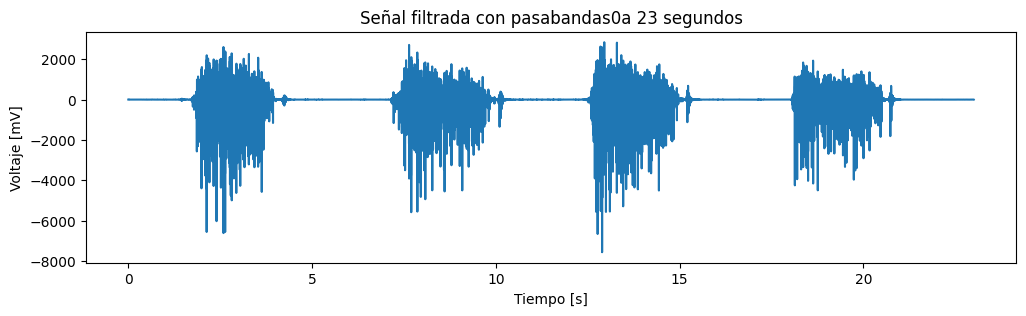

In [3]:
nyq = sampleRate*0.5 #frecuencia de muestre y ripple
low = 10 / nyq #bandwith inferior
high = 450 / nyq #bandwith superior #rangos de 2 a 45 por ruido de freq cardiaca
b, a = butter(3, [low, high], btype='band') #describir el orden de los filtros
env = filtfilt(b, a, waveData[t_0:t_f])
plt.figure(figsize=(12,3))
plt.plot(timeEMG[t_0:t_f],env)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [mV]')
plt.title('Señal filtrada con pasabandas'+ str(t0) + 'a ' + str(tf)+ ' segundos')

Text(0.5, 1.0, 'Señal filtrada con pasabandas0a 23 segundos')

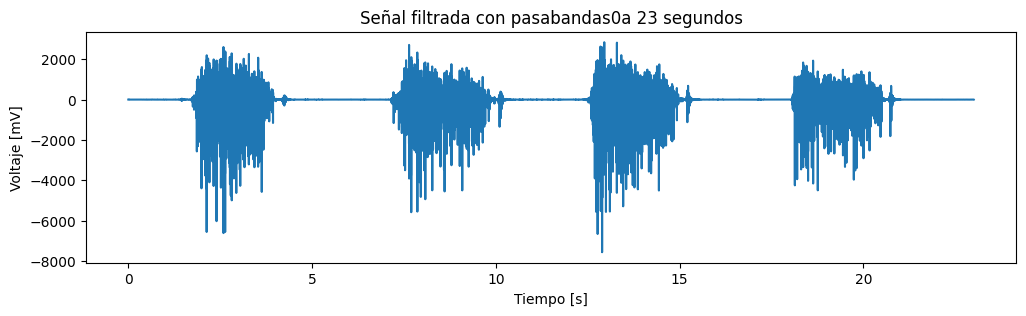

In [5]:
nyq = sampleRate*0.5 #frecuencia de muestre y ripple
low = 10 / nyq #bandwith inferior
high = 450 / nyq #bandwith superior #rangos de 2 a 45 por ruido de freq cardiaca
b, a = butter(3, [low, high], btype='band') #describir el orden de los filtros
env = filtfilt(b, a, waveData[t_0:t_f])
plt.figure(figsize=(12,3))
plt.plot(timeEMG[t_0:t_f],env)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [mV]')
plt.title('Señal filtrada con pasabandas'+ str(t0) + 'a ' + str(tf)+ ' segundos')

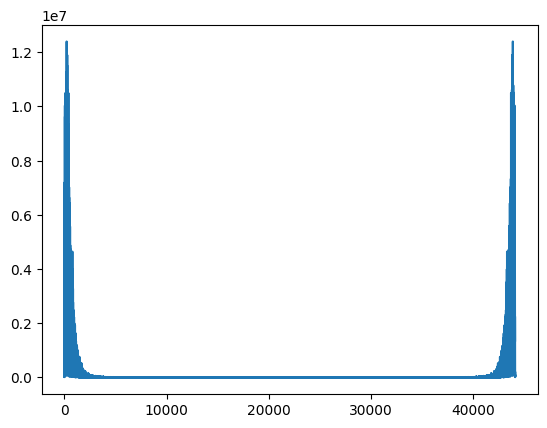

In [6]:
ondaemg=waveData[t_0:t_f]
X = fft(ondaemg)
N = len(X)
n = np.arange(N)
T = N/sampleRate
freq = n/T 
XX=abs(X)
plt.plot(freq,XX)

(0.0, 1500.0)

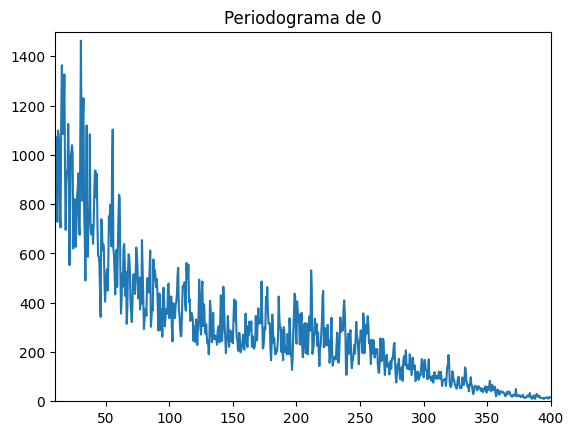

In [7]:
emg_mag=np.abs(env)
#Periodograma ventana rectangular con señal rectificada
ventana=22050
f, P = signal.welch(emg_mag, ventana, nperseg=sampleRate) #envolvente, ventana, fm
plt.plot(f,P)
plt.title('Periodograma de ' +str(t0))
plt.xlim(10,400)
plt.ylim(0,1500)

Text(0.5, 1.0, 'Espectrograma de Signal')

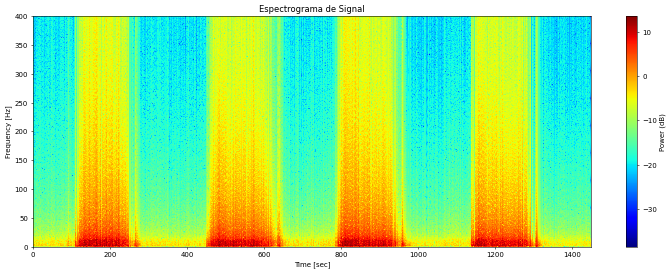

In [8]:
f, t, sxx = signal.spectrogram(emg_mag,sampleRate,nperseg=800,scaling='spectrum')
plt.figure(figsize=(18,6),dpi=50) 
plt.pcolormesh(np.log(sxx),cmap='jet') 
plt.ylabel('Frequency [Hz]') 
plt.xlabel('Time [sec]') 
plt.colorbar(label='Power (dB)') 
plt.title('Espectrograma de Signal') #plt.ylim(0,500)